## Basic starter

### Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

### Importing data from a dataset from Tensroflow/Keras with a set of values

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Reshaping data

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
# We keep the number of rows the same and we add the depth (the final 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# print(f"Value of X training set {x_train}\nValue of X test set is {x_test}")

In [5]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [6]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

## Starting the Convolutional Neural Network

### Part 1 - Building the CNN

##### Importing the Keras libraries and packages

In [7]:
from keras.models import Sequential
# adding convolution layer for 2d images
from keras.layers import Convolution2D 
# Adding Pooling Layers
from keras.layers import MaxPooling2D
from keras.layers import Flatten          
from keras.layers import Dense

In [7]:
# Adding an optional optimizer
# adam = keras.optimizers.Adam()

##### Initializing the CNN

In [8]:
classifier = Sequential()

#### Step 1 - Convolution

In [9]:
# num_of_filters/feature_map
# num_of_rows in feature detecter table
# num_of_rows in feature detecter table
# If its a coloured image, the depth will change from 1 to 3
classifier.add(Convolution2D(28, 3, 3, input_shape = (28, 28, 1), 
                             activation = 'relu'))

#### Step 2 - Pooling

In [10]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

#### Step 3 - Flattening

In [11]:
classifier.add(Flatten())

#### Step 4 - Full connection

In [12]:
# classifier.add(Dense(output_dim = 128, activation = 'relu'))    -> changed the value to units because there were errors
classifier.add(Dense(units = 128, activation = 'relu'))
# Softmax will give us 10 probabilites -> 1 per class
# classifier.add(Dense(output_dim = 10, activation = 'softmax'))  -> changed the value to units because there were errors
classifier.add(Dense(units = 10, activation = 'softmax'))

#### Compiling the CNN

In [13]:
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['accuracy'])

In [14]:
classifier.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 3ms/step - loss: 0.3567 - accuracy: 0.8935
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1593 - accuracy: 0.9506
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1227 - accuracy: 0.9606
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0984 - accuracy: 0.9687
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9732
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0713 - accuracy: 0.9770
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0604 - accuracy: 0.9812
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9827
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0454 - accuracy: 0.9851
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.03

In [15]:
classifier.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0832 - accuracy: 0.9748


[0.08321090787649155, 0.9747999906539917]

##### Additional comments
#### To calculate the Confusion Matrix

In [ ]:
"""
import numpy as np
# confusion matrix creation
y_pred = classifier.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

from sklearn.metrics import accuracy_score,confusion_matrix
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
"""

#### Displaying the prediction results

##### Displaying the prediction's value using matplotlib

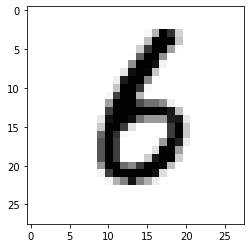

In [23]:
import matplotlib.pyplot as plt
# 0 to 9999
image_index = 3424
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')

In [24]:
pred = classifier.predict(x_test[image_index].reshape(1, 28, 28, 1))
pred

array([[1.1297677e-09, 1.6739715e-12, 5.4058296e-09, 1.5960184e-07,
        1.1605286e-08, 1.6999910e-04, 9.9982989e-01, 3.0132577e-14,
        4.8444722e-08, 6.0496941e-09]], dtype=float32)

In [25]:
# Index number with the maximum value
print(pred.argmax())

6
